In [9]:
import paramiko
import sys
import os
import pickle
import numpy as np
sys.path.append(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project')

from execute_remote_scripts import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Downloading tailored data from server

In [ ]:
remote_script_path = "/home/tost/NoTivoli/remote_processing_csv_w_dtIPLA.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\remote_processing_csv_w_dtIPLA.py"
remote_folder = "/home/tost/NoTivoli/downsampled_csvs_w_dtIPLA_conv/"
local_folder = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_Files_w_dtIP_conv"

# Execute the remote script
execute_remote_script_download(local_script_path, remote_script_path, remote_folder, local_folder)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\remote_processing_csv_w_dtIPLA.py to /home/tost/NoTivoli/remote_processing_csv_w_dtIPLA.py


## Plotting downloaded data

C:\Users\Max Tost\AppData\Local\Temp\ipykernel_2760\1295605290.py:17: RuntimeWarning: invalid value encountered in divide
  plt.plot(time, features[feature].to_numpy() / max(np.abs(features[feature].to_numpy())), label=feature)


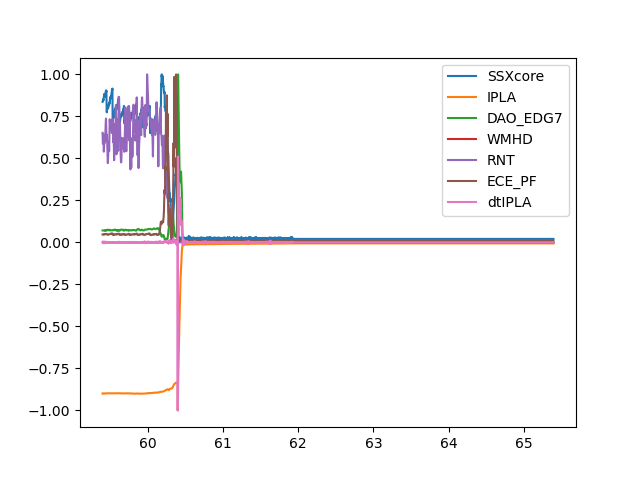

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

# Load the data
data = pd.read_csv(r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\CSV_Files_w_dtIPLA\JETno80708.csv")

# Extract time and features
time = data["time"]
features = data.drop(columns=["time"])

# Close any existing plots
plt.close()

# Plot each feature against time
for feature in features.columns:
    plt.plot(time, features[feature].to_numpy() / max(np.abs(features[feature].to_numpy())), label=feature)

# Add legend
plt.legend()

# Show the plot
plt.show()

## Uploading a script on the server and executing it, no download

In [4]:
remote_script_path = "/home/tost/check_keys.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/check_keys.py"

# Execute the remote script and retrieve the results

# DONT FORGET TO UPDATE ALL 3 POSITIONS OF THE KEY IN THE CHECK-KEYS SCRIPT
execute_remote_script(local_script_path, remote_script_path)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts/check_keys.py to /home/tost/check_keys.py
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno82819.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81543.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno83363.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno83404.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81233.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno82934.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno82227.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81210.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81468.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno83367.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno83438.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno81203.mat
Processing file: /Lac8_D/DEFUSE/DEFUSE_DB/DB_mat/JETno83362.mat
Processing fi

## Plotting files

In [100]:
pickle_file_name = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\all_JET_data.pkl"  # Example Pickle file name
data = load_pickle(pickle_file_name)

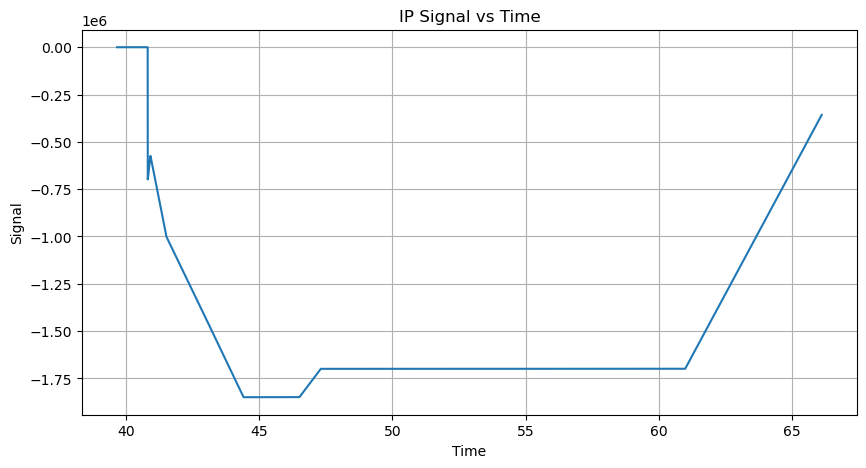

In [14]:
n = 0  # Index of key to plot
shot = -1  # Index of shot to plot

shot_data = data[list(data.keys())[shot]]
keys_jet = ['IP', 'WMHD', 'RNT', 'DAI_EDG7']
plot_data(shot_data, keys_jet[n])

In [78]:
data.keys()

dict_keys(['JETno80962', 'JETno80976', 'JETno80911', 'JETno80821', 'JETno81200', 'JETno80331', 'JETno80822', 'JETno80823', 'JETno80824', 'JETno81197'])

## Installing extensions on server

In [69]:
# Define the paths for the check script
remote_script_path = "/home/tost/check_extensions.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\check_extensions.py"

# Execute the remote script to check for necessary extensions
execute_remote_script(local_script_path, remote_script_path)

SFTP session established!
Uploaded C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\check_extensions.py to /home/tost/check_extensions.py
scipy is installed.
paramiko is installed.
h5py is installed.
numpy is installed.
pickle is installed.
torch is NOT installed.
Missing packages: ['torch']

/home/tost/.local/lib/python2.7/site-packages/paramiko/transport.py:33: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography.hazmat.backends import default_backend

SFTP session closed.


In [ ]:
# Define the paths for the install script
remote_script_path = "/home/tost/install_packages.py"
local_script_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Server_Scripts\install_packages.py"

# Execute the remote script to install the missing packages
execute_remote_script(local_script_path, remote_script_path)

## Downloading pickle file on server if it exists

In [10]:
# Example usage
remote_file_path = "/home/tost/NoTivoli/all_JET_data.pkl"
local_file_path = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl"

# Download the existing Pickle file
download_existing_pickle(remote_file_path, local_file_path)

SFTP session established!
Attempting to download /home/tost/NoTivoli/all_JET_data.pkl to C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl
An error occurred: Garbage packet received


In [10]:
pickle_file_name = r"C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\all_JET_data_existing.pkl"  # Example Pickle file name
data = load_pickle(pickle_file_name)

## Opening csv file with RE detected shots

In [6]:
import numpy as np
import csv
import pandas as pd

# Read the shot numbers from the CSV file
shot_numbers = []
with open(r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        shot_numbers.append(int(row[0]))

# Convert the list of shot numbers to a NumPy array
shot_numbers_array = np.array(shot_numbers)

print(len(shot_numbers_array))

0


## Save shot numbers to csv

In [18]:
txt_file = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.txt'
csv_file = r'C:\Users\Max Tost\Desktop\Notebooks\SPC Neural Network Project\Data\automatic_RE_numbers.csv'
with open(txt_file, 'r') as f:
    lines = f.readline().strip().split()

df = pd.DataFrame(lines)

# Save the DataFrame as a CSV file
df.to_csv(csv_file, index=False, header=False)